In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
#import fakeGalaxy
#reload(fakeGalaxy)
import numpy as np
import seWrapper
import gcSampler
import densityGC
import densityFG
import subprocess as sp
import SourceCompleteness
import corner
import pickle
reload(seWrapper)
reload(gcSampler)
reload(densityGC)
reload(densityFG)
reload(SourceCompleteness)

<module 'SourceCompleteness' from '/Users/zacharyjennings/Google Drive/gc_select/SourceCompleteness.pyc'>

In [113]:
gc = gcSampler.gcSampler(50.,\
                fractions=np.array([0.25,0.25,0.5]),center=[2000.,2000.],spatial=np.array([5e5,0.7,0.0]),\
                  max_rad=2000.,radial_profile=None,mock=True,n_source=1000,ellipticity=True,\
                         n_pop=2,fixed_cov=False,fixed_lum=False,lum_function='mag_only',
                         completeness='full',fg_faint=26.,incomplete=False,
                         fg_bright=18.,lum_mean=np.array([24.]),lum_sig=np.array([1.4]))

In [114]:
gc.runSampler(2000.,burn_steps=1000.)
#gc.data

f_gc median,  16 %, and  84 %  0.301413924356    0.191116757174    0.454921944324
f_gc_2 median,  16 %, and  84 %  0.268209554607    0.0375838730035    0.391534430127
mu_gi_1 median,  16 %, and  84 %  1.03594297969    0.936911763711    1.06888219828
mu_ri_1 median,  16 %, and  84 %  0.30519250963    0.258850726277    0.327907903033
sig_gi_1 median,  16 %, and  84 %  0.00988497893225    0.00603838805244    0.0283965301166
sig_ri_1 median,  16 %, and  84 %  0.00257734869349    0.00139853438926    0.00599949522217
cov_1 median,  16 %, and  84 %  0.00389853593439    0.00164124488594    0.0122152909861
mu_gi_2 median,  16 %, and  84 %  0.788089671247    0.703102749673    0.846165221719
mu_ri_2 median,  16 %, and  84 %  0.198881842786    0.17206096633    0.220804800435
sig_gi_2 median,  16 %, and  84 %  0.0211921693555    0.0117678887113    0.0351579638431
sig_ri_2 median,  16 %, and  84 %  0.00370631315303    0.00194324008428    0.0105878863445
cov_2 median,  16 %, and  84 %  0.007743641216

In [115]:
#print gc.norm.test_grid
#print gc.completeness.completeness
#print gc.norm.test_complete

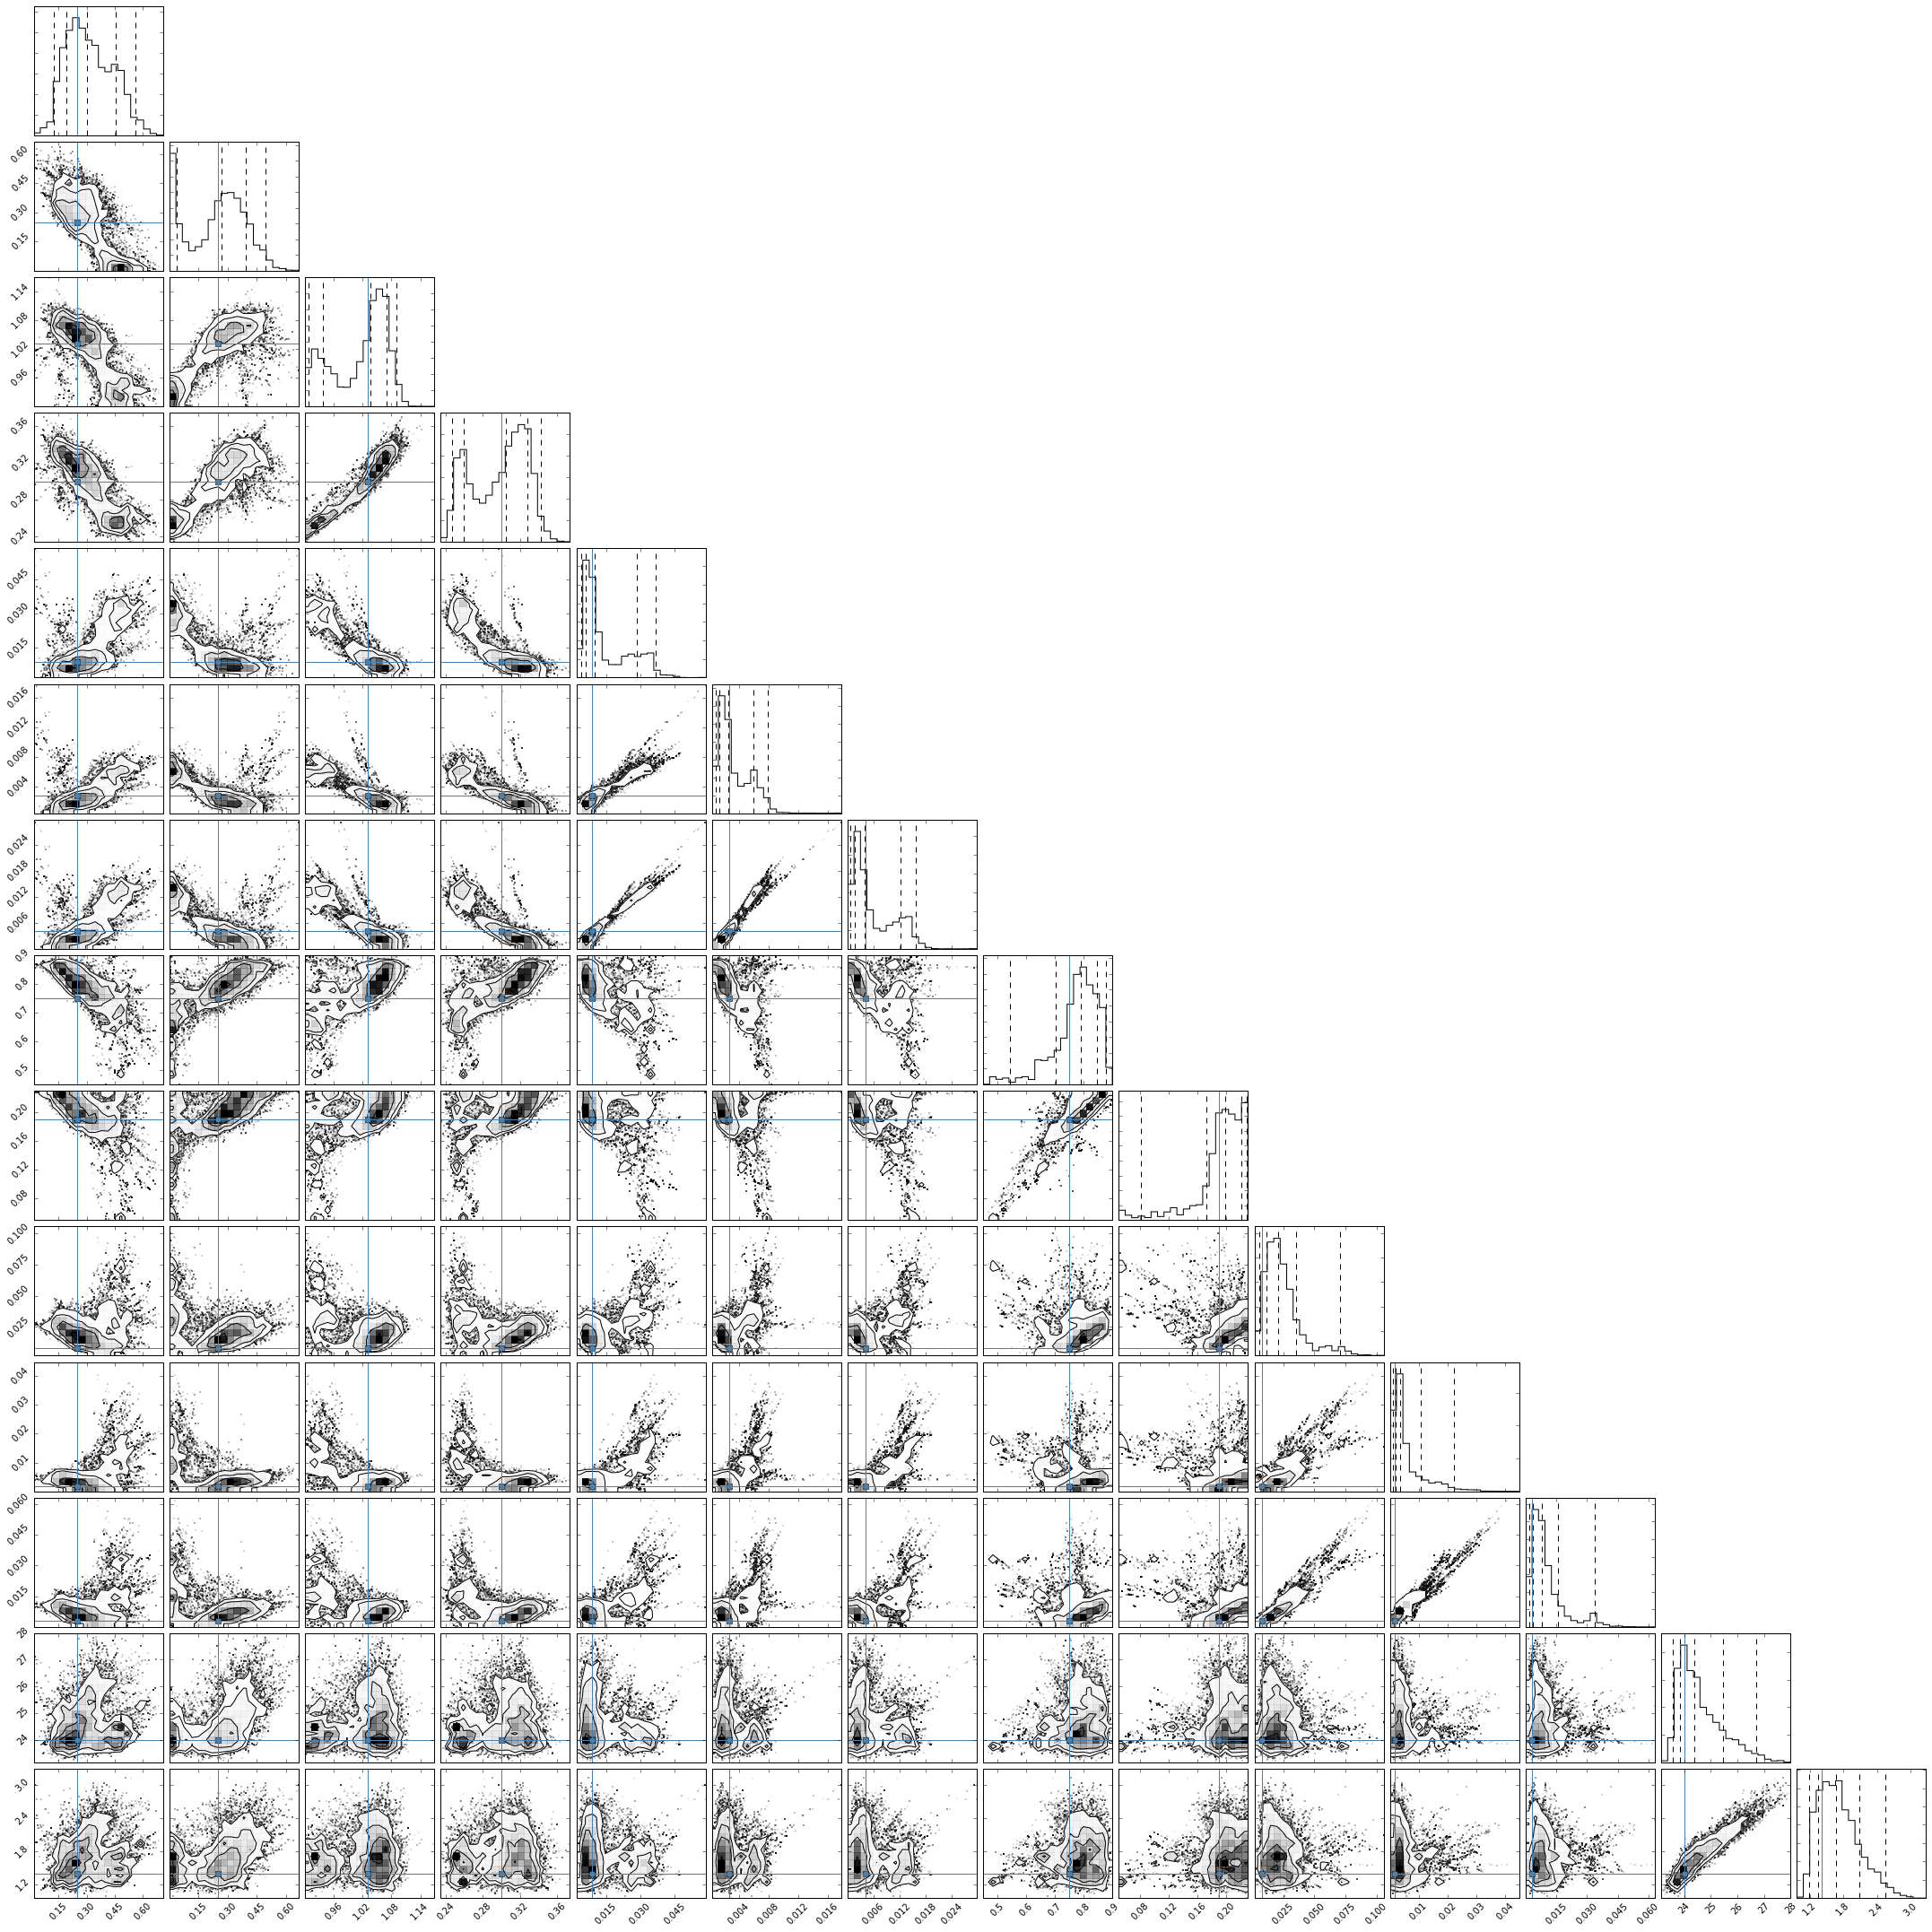

In [116]:
fig = corner.corner(gc.sampler.chain[:,1000:,:].reshape(-1,gc.n_dim),quantiles=[0.025,0.16, 0.5, 0.84,0.975],
                    truths=gc.theta_init)

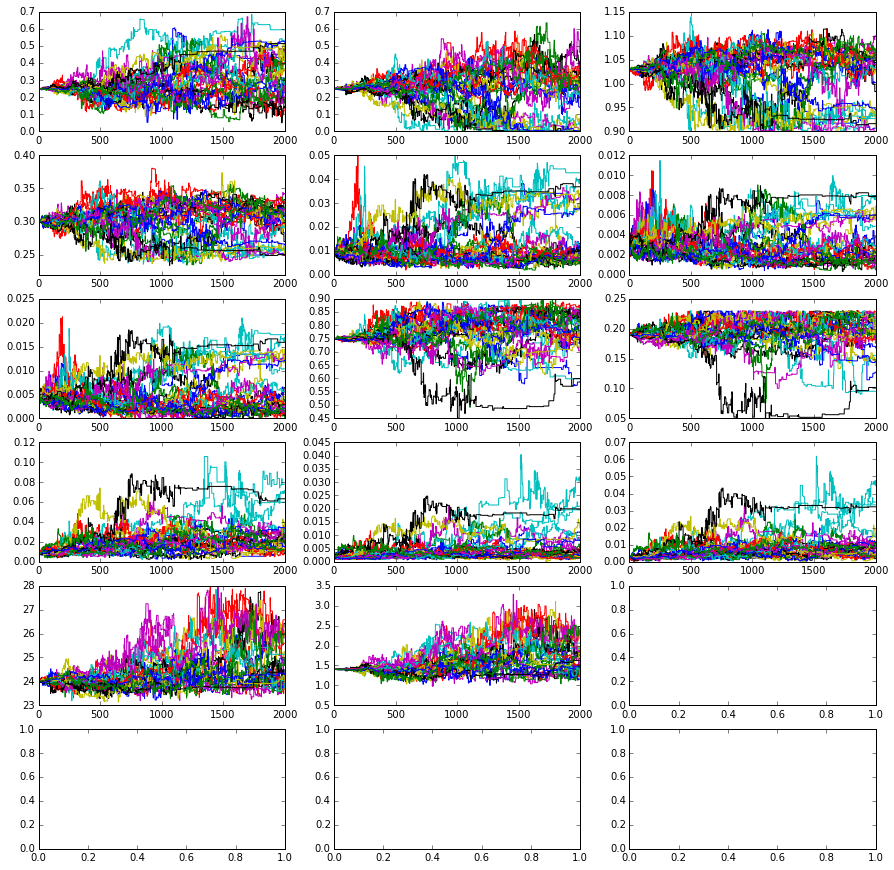

In [117]:
fig,ax = plt.subplots(figsize=(15,15),ncols=3,nrows=6,dpi=1000)

for i in range(gc.n_dim):
    for j in range(30):
        ax[i/3,i%3].plot(gc.sampler.chain[j,:,i])

In [ ]:
print np.sum(gc.norm.lum_like)

In [122]:
print gc.new_n_gc

325.0


In [18]:

print gc.fg_complete_norm
print gc.fg_faint,gc.faint_complete_mag
print 1./(gc.faint_complete_mag - gc.fg_bright) * ((gc.bright_complete_mag - gc.fg_bright)\
    *(gc.complete_grid[gc.faint_complete_ind] - gc.complete_grid[gc.bright_complete_ind]) * gc.mag_grid_delta)
#print gc.mag_grid[gc.fg_faint_ind]
#print gc.bright_complete_mag
#print gc.complete_grid[gc.faint_mag_ind] - gc.complete_grid[gc.mid_mag_ind]
print gc.fg_faint_ind

0.809974077592
26.0

AttributeError: 'gcSampler' object has no attribute 'faint_complete_mag'

In [192]:
c_blue = [-1.0,-1.0]
c_red = [4.0,3.0]
c1_grid_res = 0.01
c2_grid_res = 0.01
c1 = np.arange(c_blue[0],c_red[0],c1_grid_res)
c2 = np.arange(c_blue[1],c_red[1],c2_grid_res)

#perform the 2D sum to calculate normalization term for color
cc1,cc2 = np.meshgrid(c1,c2)
inds_1,inds_2 = np.meshgrid(np.linspace(0,c1.size-1,c1.size),np.linspace(0,c2.size-1,c2.size))
grid_size_2d = c1_grid_res * c2_grid_res
grid_area = (c_red[0] - c_blue[0]) * (c_red[1]- c_blue[1])
color_norm = np.sum(np.exp(gc.fg.lnLikeColor(cc1.ravel(),cc2.ravel()))*grid_size_2d)

In [193]:
ln_like = gc.fg.lnLikeColor(cc1.ravel(),cc2.ravel())

In [194]:
print grid_size_2d
print np.sum(np.exp(ln_like) * grid_size_2d)

0.0001
0.999040402869


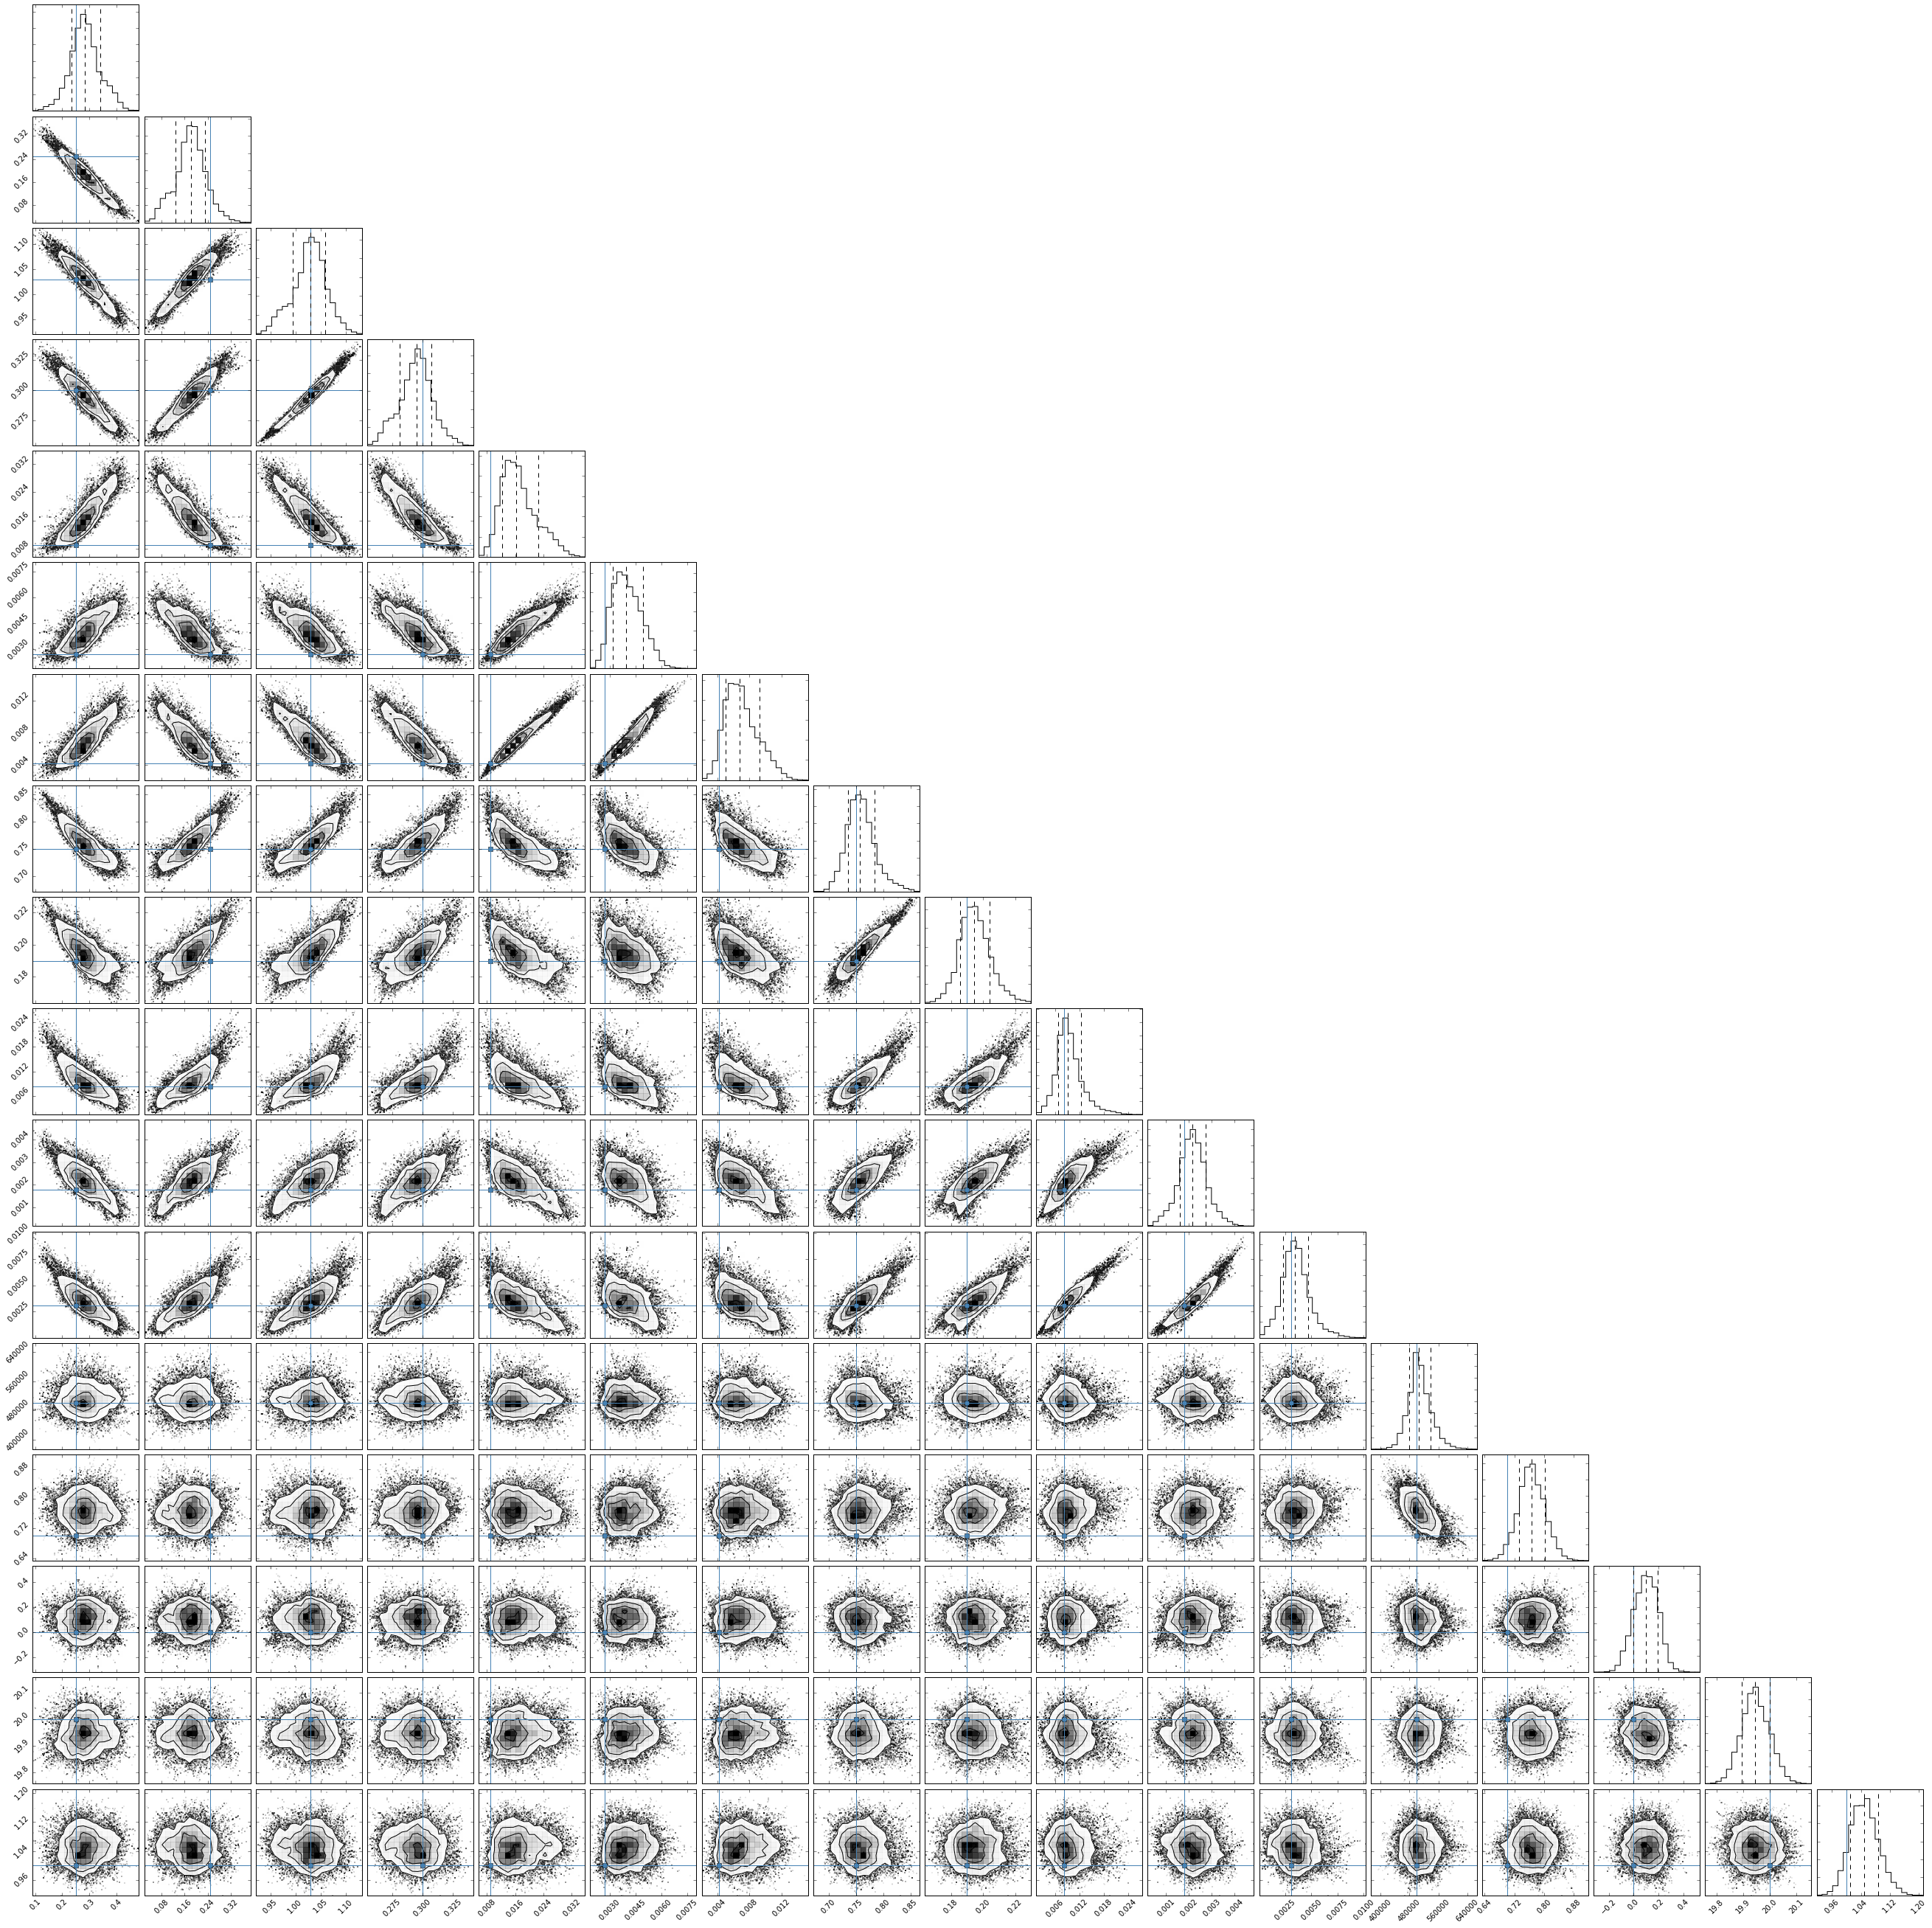

In [37]:
fig = corner.corner(gc.sampler.chain[:,4000:,:].reshape(-1,17),quantiles=[0.16, 0.5, 0.84],truths=gc.theta_init)

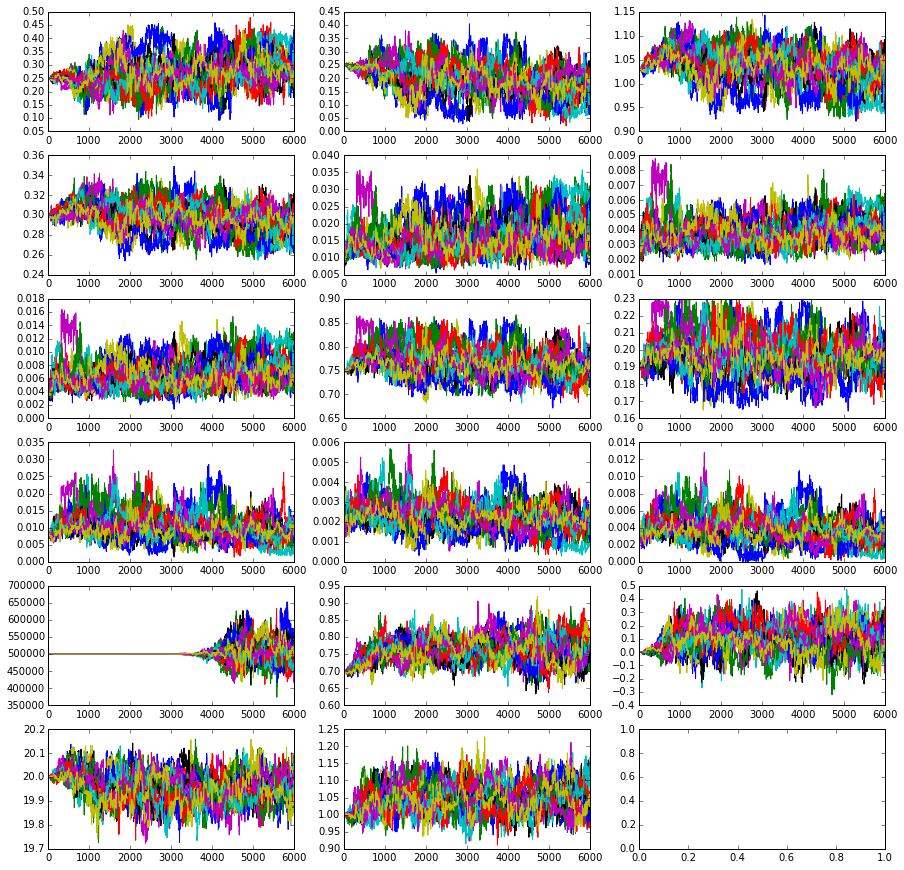

In [38]:
fig,ax = plt.subplots(figsize=(15,15),ncols=3,nrows=6,dpi=1000)

for i in range(17):
    for j in range(20):
        ax[i/3,i%3].plot(gc.sampler.chain[j,:,i])

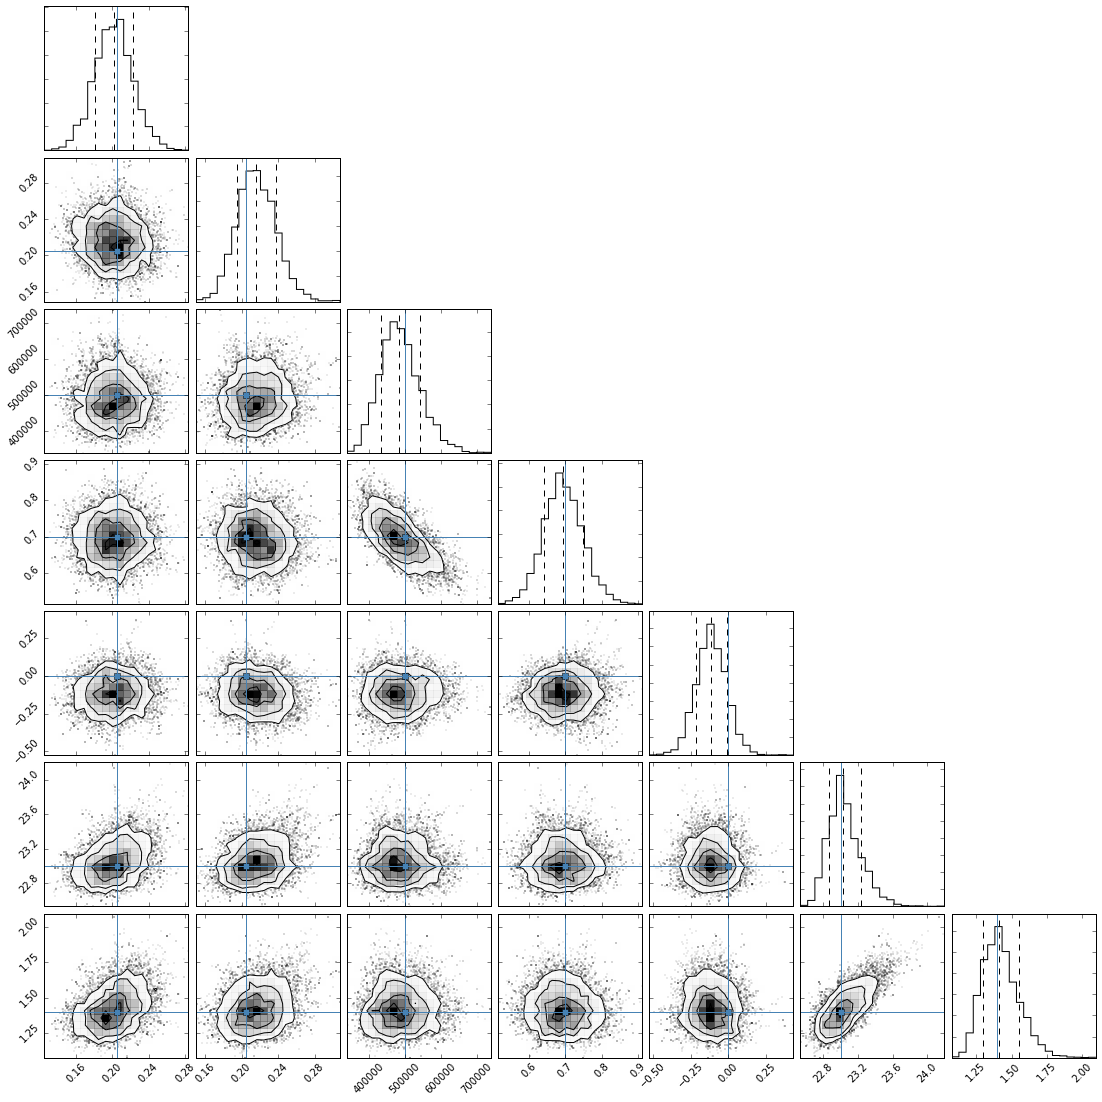

In [898]:
fig = corner.corner(gc.sampler.chain[:,1000:,:].reshape(-1,7),quantiles=[0.16, 0.5, 0.84],truths=gc.theta_init)

IndexError: index 7 is out of bounds for axis 2 with size 7

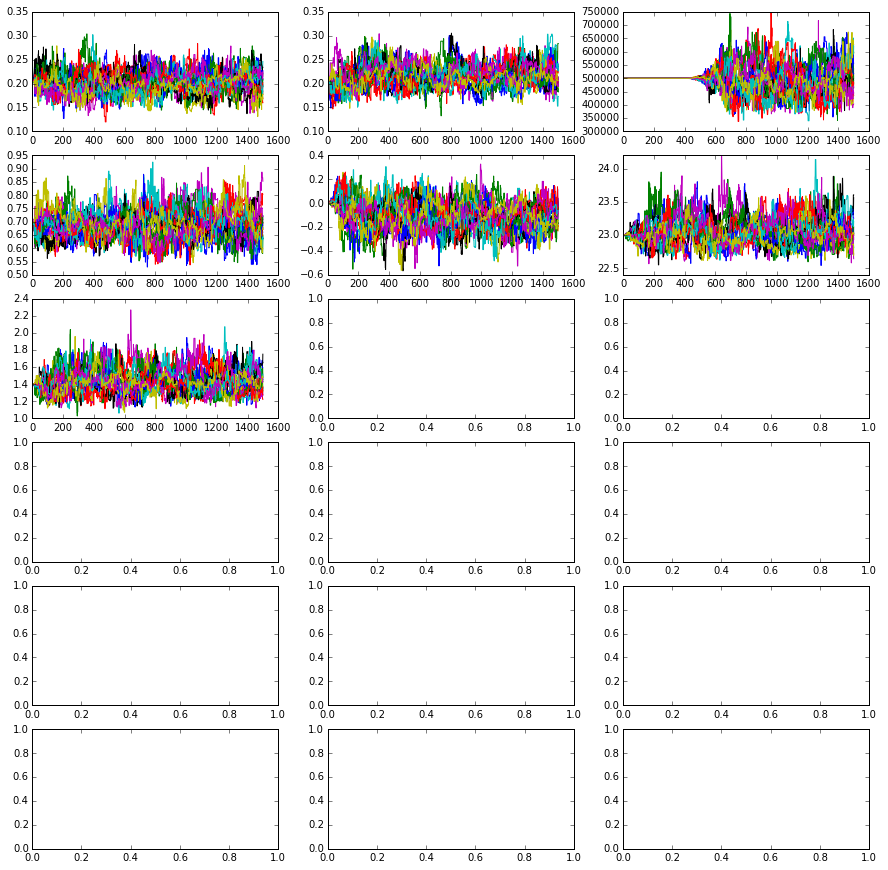

In [899]:
fig,ax = plt.subplots(figsize=(15,15),ncols=3,nrows=6,dpi=1000)

for i in range(17):
    for j in range(20):
        ax[i/3,i%3].plot(gc.sampler.chain[j,:,i])

#### Plots below show inference for luminosity parameters w/o considering incompleteness

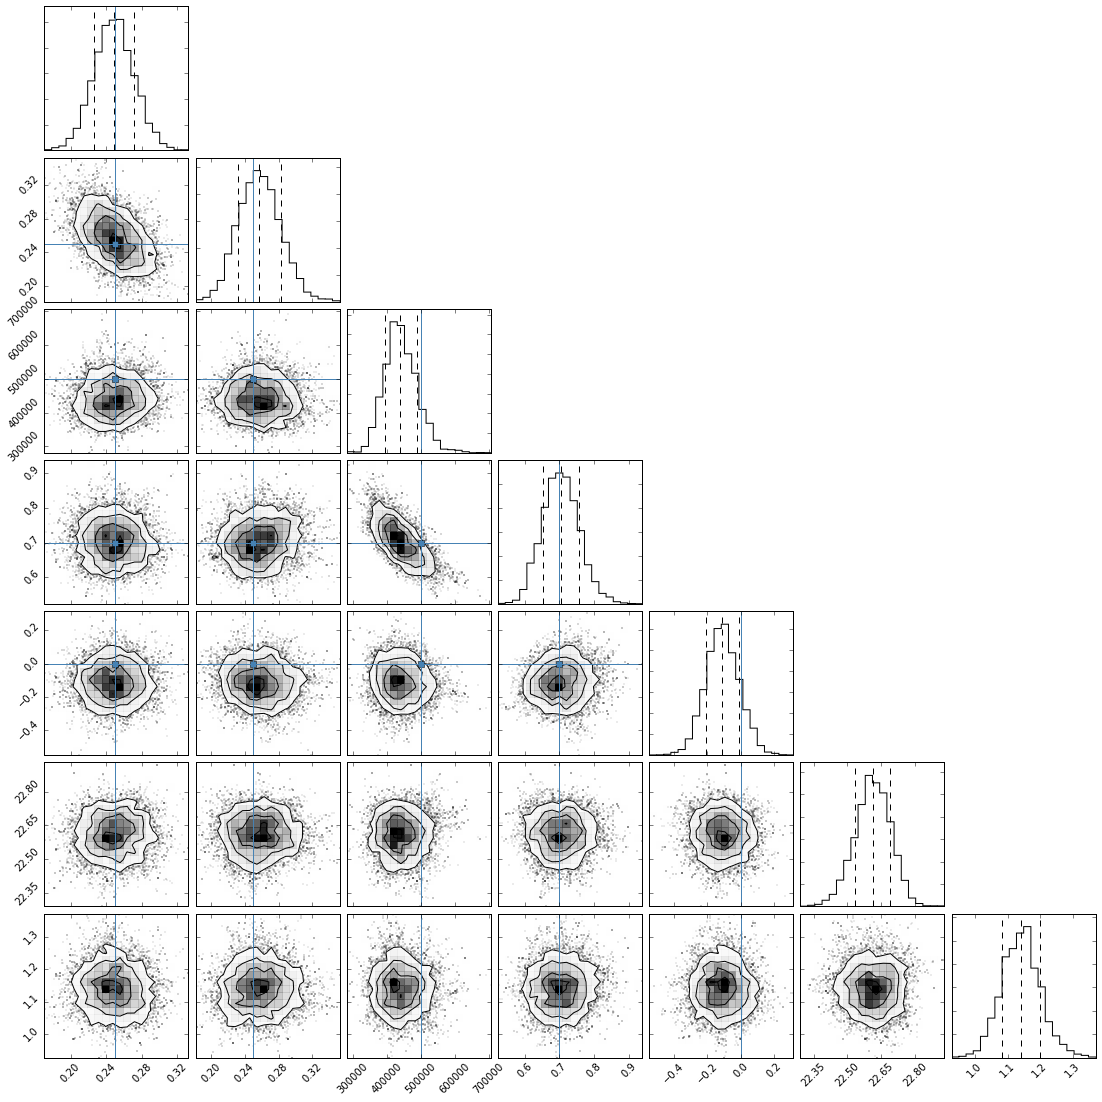

In [866]:
fig = corner.corner(gc.sampler.chain[:,1000:,:].reshape(-1,7),quantiles=[0.16, 0.5, 0.84],truths=gc.theta_init)

IndexError: index 7 is out of bounds for axis 2 with size 7

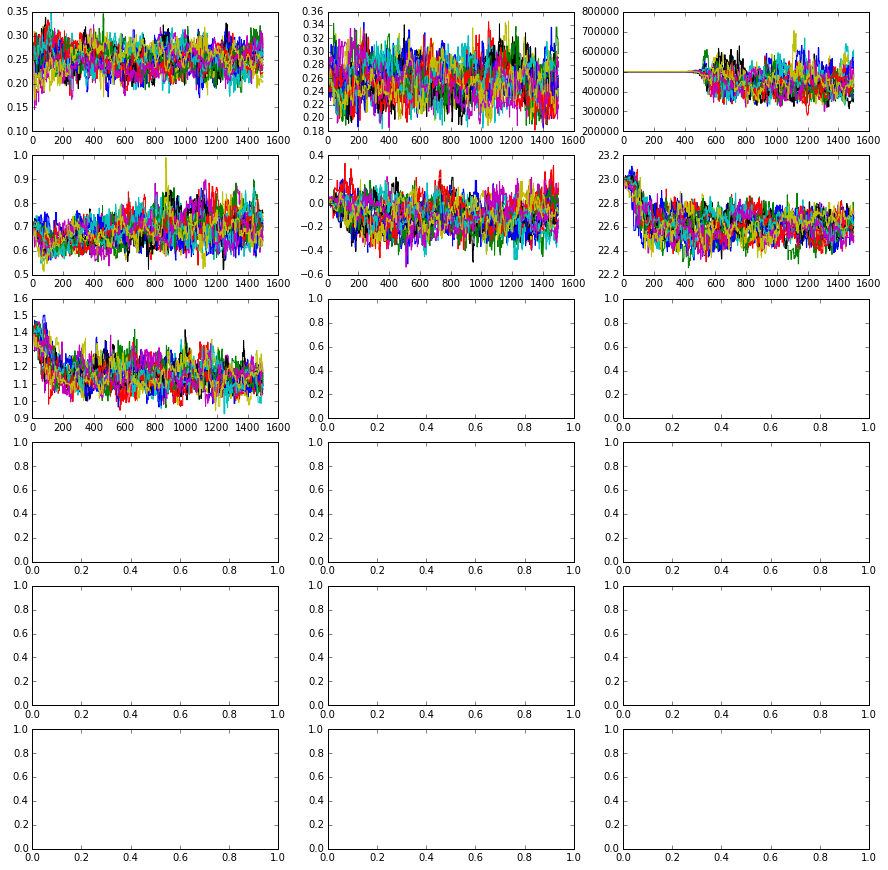

In [867]:
fig,ax = plt.subplots(figsize=(15,15),ncols=3,nrows=6,dpi=1000)

for i in range(17):
    for j in range(20):
        ax[i/3,i%3].plot(gc.sampler.chain[j,:,i])
        


In [859]:
gc.faint_complete_norm

0.34296118830350142

In [249]:
rec_data[1].shape
ra = np.ones(rec_data[1].shape)
dec = np.ones(rec_data[1].shape)
foo_dat = np.c_[rec_data[1].T,ra.T,dec.T]
print foo_dat.shape
scale_mag,scale_x,scale_y = completeness_obj.Scale(foo_dat.T)
print scale_mag

(543, 3)
[-0.97225  -0.961625 -1.16855  -1.42475  -0.91245  -0.09545  -0.89235
 -0.693725 -0.9033   -1.183325 -0.396625 -0.654475 -1.0282   -0.881825
 -0.67985  -0.85705  -0.9083   -0.920425 -1.0117   -0.8276   -1.098725
 -1.199475 -0.80245  -0.806375 -1.271925 -0.97675  -1.241425 -1.135825
 -1.06445  -0.63545  -1.19445  -0.81105  -0.7035   -1.161275 -1.390725
 -1.25525  -0.689125 -0.787125 -1.081    -1.0508   -0.89885  -0.790475
 -1.00575  -1.116525 -1.2868   -1.31775  -1.418525 -0.906075 -1.055575
 -1.03655  -0.835775 -1.055275 -1.137525 -1.30125  -1.28775  -0.971525
 -1.0013   -0.990575 -1.046375 -1.174775 -0.862975 -0.9069   -1.180325
 -0.8894   -0.849975 -0.692425 -0.882625 -1.023125 -1.026175 -0.974925
 -1.0809   -0.959525 -0.70075  -0.577425 -0.605925 -0.64035  -0.714025
 -0.773725 -1.099575 -0.67235  -0.587025 -1.04475  -1.2489   -0.57285
 -1.27225  -0.88185  -0.8705   -0.91745  -0.590375 -0.96385  -1.124425
 -0.495575 -0.8839   -0.481775 -0.977525 -1.045275 -1.32715  -0.5999
 

In [41]:
fg = fakeGalaxy.fakeGalaxy()

In [42]:
fg.makeSampler(30.,fractions=np.array([0.25,0.25,0.5]),n_source=1000,center=[2000.,2000.],\
               spatial=np.array([5e5,0.7,0.0]),lum_function='gaussian',\
                  max_rad=2000.,radial_profile='exponential',n_pop=2,ellipticity=True,\
                  lum_mean=np.array([22.]),lum_sig=np.array([1.4]),fg_faint=26.,fg_bright=19.,\
                  completeness=None)
model = fg.getModel(model='gaussian',amp=50.,center=(2000.,2000.),\
                    x_stddev=500.,y_stddev=500.)


(array([ 11.,  32.,  22.,  19.,  27.,  47.,  40.,  30.,  53.,  37.,  71.,
         64.,  62.,  65.,  63.,  62.,  65.,  39.,  56.,  32.,  32.,  27.,
         34.,   8.,   2.]),
 array([ 16.88677482,  17.12686295,  17.36695108,  17.60703921,
         17.84712734,  18.08721548,  18.32730361,  18.56739174,
         18.80747987,  19.047568  ,  19.28765613,  19.52774426,
         19.76783239,  20.00792052,  20.24800865,  20.48809679,
         20.72818492,  20.96827305,  21.20836118,  21.44844931,
         21.68853744,  21.92862557,  22.1687137 ,  22.40880183,
         22.64888997,  22.8889781 ]),
 <a list of 25 Patch objects>)

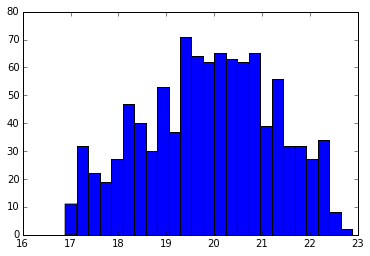

In [18]:
plt.hist(fg.sampler.data[1],bins=25)

924

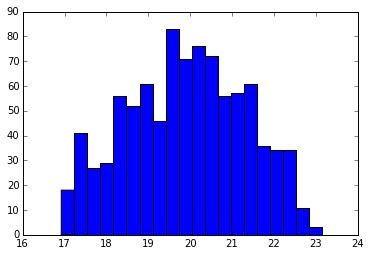

In [24]:
plt.hist(rec_data[1],bins=20)
rec_data[1].size

In [43]:
fg.makeGalaxyImage(model,dimensions=(4000,4000),gain=1.0,rdnoise=0.0)

In [44]:
sp.call('sex fake_gal_model_g_sources.fits -CATALOG_NAME g_fake_gal.cat -c fake_gal.sex',shell=True)
sp.call('sex fake_gal_model_r_sources.fits -CATALOG_NAME r_fake_gal.cat -c fake_gal.sex',shell=True)
sp.call('sex fake_gal_model_i_sources.fits -CATALOG_NAME i_fake_gal.cat -c fake_gal.sex',shell=True)

0

In [45]:
cat = seWrapper.seCatalog()
cat.createNewCatalog('g_fake_gal.cat',filter='g')
cat_g = seWrapper.seCatalog()
cat_g.createNewCatalog('g_fake_gal.cat',filter='g_rec')
cat_r = seWrapper.seCatalog()
cat_r.createNewCatalog('r_fake_gal.cat',filter='r')
cat_i = seWrapper.seCatalog()
cat_i.createNewCatalog('i_fake_gal.cat',filter='i')

cat.mergeCatalog(cat_r)
cat.mergeCatalog(cat_i)

In [46]:
cat_g.mags['g_rec'].size

803

In [47]:
x,y = cat.getXY('fake_gal_model_g_sources.fits') 
#x = x / 1000.
#y = y / 1000.
d = cat.all_detected
rec_data = (np.vstack([cat.mags['g'][d]-cat.mags['i'][d],cat.mags['r'][d]-cat.mags['i'][d]]).T,\
            cat.mags['g'][d],np.vstack([x[d],y[d]]).T)

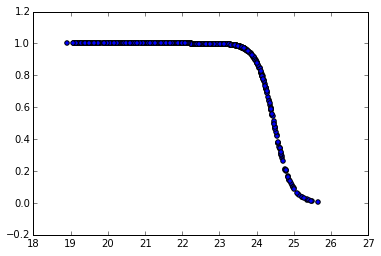

In [676]:
plt.scatter(gc.data[1],np.exp(gc.ln_complete))

In [748]:
mag_grid = np.linspace(22,26,1000)
max_mag = np.argmin(np.abs(np.exp(completeness_obj.QueryComplete(mag_grid)[:,0]) - 0.01))
#print np.argmin(np.abs(completeness_obj.QueryComplete(mag_grid)[:,0] +  ))
min_mag =  np.argmin(np.abs(np.exp(completeness_obj.QueryComplete(mag_grid)[:,0]) - 0.999))

complete_mag_range = mag_grid[min_mag:max_mag]

print np.sum(np.exp(completeness_obj.QueryComplete(complete_mag_range)[:,0])) #+ # * 1./(complete_mag_range.size))
print mag_grid[max_mag]
print mag_grid[min_mag]
print min_mag

407.238303732
25.5355355355
22.8368368368
209


768

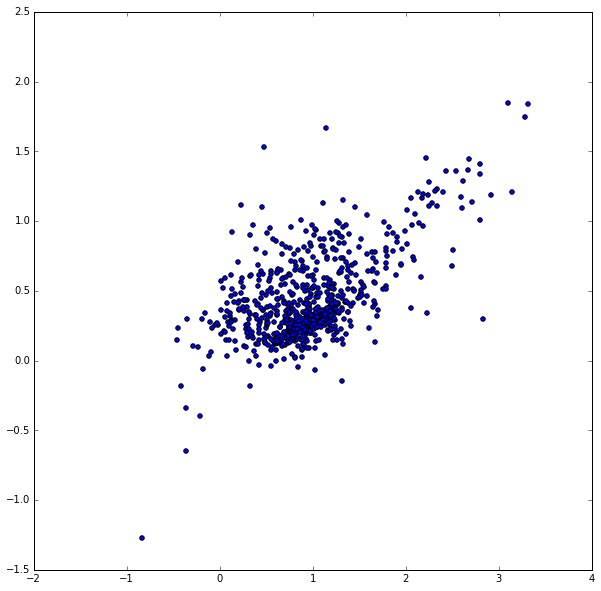

In [965]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(gc.data[0][:,0],gc.data[0][:,1])
rec_data[1].size

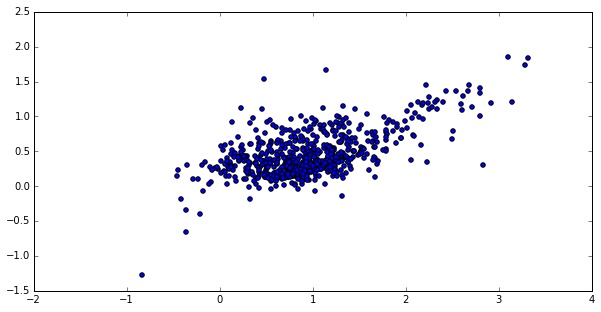

In [966]:
fig,ax = plt.subplots(figsize=(10,5))
plt.scatter(rec_data[0][:,0],rec_data[0][:,1])

In [967]:
fake = seWrapper.fakeStarTests('fake_gal_model.fits',cat,config_file='fake_gal.sex')
fake.genFakeCatalogs(n_stars=1000,min_mag=22,max_mag=27,n_iter=20,overwrite=True)

In [969]:
complete = SourceCompleteness.SourceCompleteness(fake,spatial=False,scale='range')

In [970]:
complete.makeSVM(gamma=0.1,C=0.1)

In [971]:
complete.save('fake_gal_completeness.p')

(array([  971.,  1018.,  1026.,   964.,  1015.,  1053.,   991.,   996.,
          996.,   970.]),
 array([-1.73776698, -1.38948164, -1.04119631, -0.69291097, -0.34462564,
         0.0036597 ,  0.35194503,  0.70023037,  1.0485157 ,  1.39680104,
         1.74508637]),
 <a list of 10 Patch objects>)

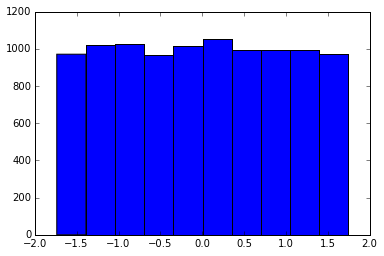

In [367]:
sampler = gcSampler.gcSampler(32.,fractions=np.array([0.5,0.5],center=[1000.,1000.],spatial=np.array([1e6])),\
                             max_rad=1000.,radial_profile='exponential')

In [968]:
mags = np.linspace(22,27,200)
x_range = np.linspace(0,2000,200)
linspace = np.array([mags,np.zeros(200)+50.,np.zeros(200) + 50.])
scaled_linspace = complete.Scale(linspace)
scaled_arr = np.array([scaled_linspace[0],scaled_linspace[1],scaled_linspace[2]])
scaled_mags = scaled_linspace[0]
plt.plot(mags,complete.completeness.predict_proba(scaled_arr.T))

ValueError: X.shape[1] = 3 should be equal to 1, the number of features at training time

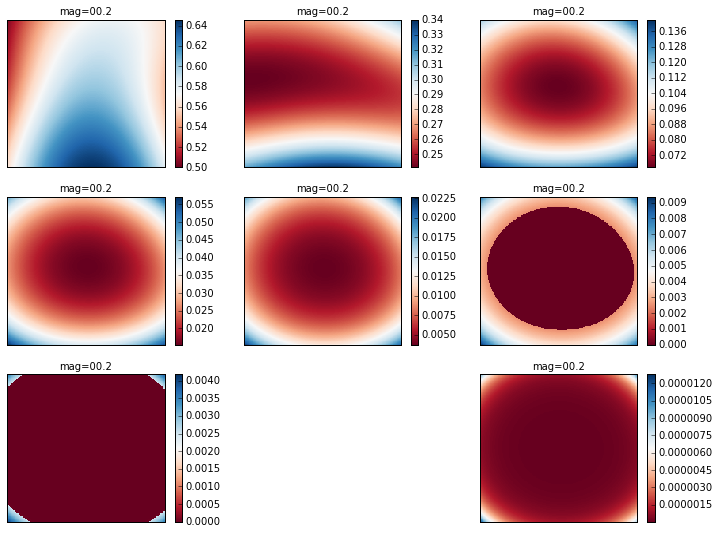

In [423]:
plt.figure(figsize=(12, 9))
mag_range = np.linspace(0.3,0.8,9.)
xx, yy = np.meshgrid(np.linspace(0.0, 1.0, 200), np.linspace(0.0, 1.0, 200))
z_holder = np.zeros((xx.size,11))
for k in mag_range:
    # evaluate decision function in a grid
    Z = complete.completeness.predict_proba(np.c_[np.zeros(xx.size)+k,xx.ravel(), yy.ravel()])
    Z = Z[:,0].reshape(xx.shape)
    #z_holder[:,int((k)*9.)] = Z.ravel()
    
    # visualize decision function for these parameters
    plt.subplot(3, 3,int((k-0.3)*18.))
    plt.title("mag=%d0.2" % k,
              size='medium')

    # visualize parameter's effect on decision function
    clr = plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.colorbar(clr)

    #plt.scatter(scale_data_small[:, 1], scale_data_small[:, 2], c=classify_small, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

/Users/zach/anaconda/envs/astro/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


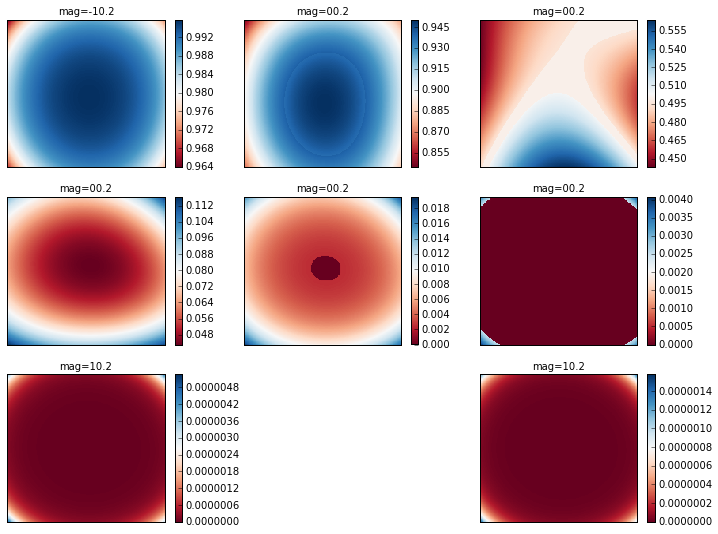

In [391]:
plt.figure(figsize=(12, 9))
mag_range = np.linspace(-1.7,1.7,9.)
xx, yy = np.meshgrid(np.linspace(-1.7, 1.7, 200), np.linspace(-1.7, 1.7, 200))
z_holder = np.zeros((xx.size,11))
for k in mag_range:
    # evaluate decision function in a grid
    Z = complete.completeness.predict_proba(np.c_[np.zeros(xx.size)+k,xx.ravel(), yy.ravel()])
    Z = Z[:,0].reshape(xx.shape)
    #z_holder[:,int((k)*9.)] = Z.ravel()
    
    # visualize decision function for these parameters
    plt.subplot(3, 3,int((k+1.7)*9./(2.*1.7)))
    plt.title("mag=%d0.2" % k,
              size='medium')

    # visualize parameter's effect on decision function
    clr = plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.colorbar(clr)

    #plt.scatter(scale_data_small[:, 1], scale_data_small[:, 2], c=classify_small, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

-0.3223


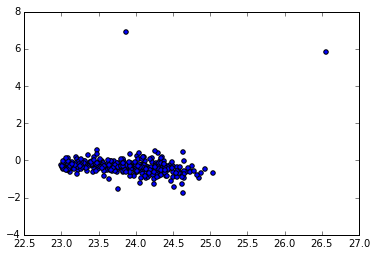

In [556]:
opt = np.get_printoptions()
np.set_printoptions(threshold='nan')
rec = fake.fake_cats['1'][0,:] - fake.fake_cats['1'][1,:] > -70
plt.scatter(fake.fake_cats['1'][0,:][rec],fake.fake_cats['1'][0,:][rec] - fake.fake_cats['1'][1,:][rec])
print np.median(fake.fake_cats['1'][0,:][rec] - fake.fake_cats['1'][1,:][rec])
np.set_printoptions(**opt)



In [409]:
print complete.completeness.predict_proba(scaled_arr.T)

[[  9.97546896e-01   2.45310374e-03]
 [  9.97385165e-01   2.61483493e-03]
 [  9.97211163e-01   2.78883661e-03]
 [  9.97023881e-01   2.97611923e-03]
 [  9.96822218e-01   3.17778156e-03]
 [  9.96604981e-01   3.39501864e-03]
 [  9.96370869e-01   3.62913064e-03]
 [  9.96118468e-01   3.88153244e-03]
 [  9.95846236e-01   4.15376413e-03]
 [  9.95552497e-01   4.44750255e-03]
 [  9.95235426e-01   4.76457379e-03]
 [  9.94893033e-01   5.10696699e-03]
 [  9.94523151e-01   5.47684930e-03]
 [  9.94123418e-01   5.87658235e-03]
 [  9.93691260e-01   6.30874013e-03]
 [  9.93223871e-01   6.77612859e-03]
 [  9.92718193e-01   7.28180704e-03]
 [  9.92170889e-01   7.82911140e-03]
 [  9.91578320e-01   8.42167971e-03]
 [  9.90936520e-01   9.06347977e-03]
 [  9.90241161e-01   9.75883932e-03]
 [  9.89487521e-01   1.05124788e-02]
 [  9.88670453e-01   1.13295468e-02]
 [  9.87784341e-01   1.22156588e-02]
 [  9.86823061e-01   1.31769386e-02]
 [  9.85779936e-01   1.42200636e-02]
 [  9.84647688e-01   1.53523125e-02]
 

In [35]:
import sys
sys.modules.keys()

['numpy.core.info',
 'astropy.wcs.utils',
 'traitlets.config.decorator',
 'distutils.sysconfig',
 'IPython.utils.PyColorize',
 'IPython.utils.pprint',
 'stsci.tools.__future__',
 'logging.weakref',
 'pprint',
 'sklearn.preprocessing',
 'sklearn.externals.joblib.logging',
 'unittest.sys',
 'ipykernel.traitlets',
 'sklearn.utils.optimize',
 'sklearn.linear_model.randomized_l1',
 'IPython.terminal.sys',
 'scipy.sparse.linalg.isolve.utils',
 'sklearn.externals.joblib.io',
 'pyraf.gki',
 'astropy.io.votable.xmlutil',
 'IPython.terminal.embed',
 'jupyter_core.sys',
 'cmd',
 'astropy.io.fits.hdu.sys',
 'IPython.core.magics.auto',
 'shlex',
 'multiprocessing.pool',
 'matplotlib.afm',
 'ipykernel.pylab.config',
 'scipy.sparse.linalg.dsolve.linsolve',
 'ipywidgets.IPython',
 'sklearn.externals.joblib.stat',
 'scipy.sparse.csgraph.numpy',
 'IPython.terminal.ipapp',
 'IPython.core.excolors',
 'astropy.io.fits.hdu.gzip',
 'astropy.modeling.mappings',
 'numpy.lib.scipy',
 'astropy.coordinates.builti

In [ ]:
log_img = np.log10(img)

plt.figure()
plt.imshow(log_img, origin='lower', interpolation='nearest',
           vmin=-1, vmax=0.5)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('Log Brightness', rotation=270, labelpad=25)
cbar.set_ticks([-1, 0, 1, 2], update_ticks=True)
plt.show()

In [ ]:
sampler = gcSampler.gcSampler(30,max_rad = 10.0,\
                             radial_profile='exponential',fractions=np.array([0.1,0.15,.75]),fixed_cov=False,\
                             ellipticity=True,n_pop=2,n_source=2000,mock=True,mock_fg_only=True,\
                             spatial=np.array([40.0,0.7,0.81]))

In [884]:
np.ones(5)

array([ 1.,  1.,  1.,  1.,  1.])